In [12]:
import pandas as pd
import altair as alt

In [59]:
df = pd.read_json(open('delhi.jsonl'), lines=True)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [66]:
judgements_per_judge = df.groupby(['judge_name', 'date'])['download_link'].nunique().reset_index()
judgements_per_judge.head()

,judge_name,date,download_link
0,CHIEF JUSTICE RAJENDRA MENON,2018-01-10,2
1,CHIEF JUSTICE RAJENDRA MENON,2018-02-11,1
2,CHIEF JUSTICE RAJENDRA MENON,2018-03-10,2
3,CHIEF JUSTICE RAJENDRA MENON,2018-03-12,2
4,CHIEF JUSTICE RAJENDRA MENON,2018-04-12,1


In [61]:
date_per_judge = df.groupby(['date', 'judge_name']).count().add_suffix('_count').reset_index()
date_per_judge.head()

,date,judge_name,case_number_count,download_link_count,party_count
0,2018-01-01,JUSTICE G. S. SISTANI,1,1,1
1,2018-01-01,JUSTICE SANGITA DHINGRA SEHGAL,1,1,1
2,2018-01-02,JUSTICE C. HARI SHANKAR,4,4,4
3,2018-01-02,JUSTICE CHANDER SHEKHAR,2,2,2
4,2018-01-02,JUSTICE G. S. SISTANI,3,3,3


In [74]:
judgements_per_judge.set_index(['date', 'judge_name']).resample('W').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

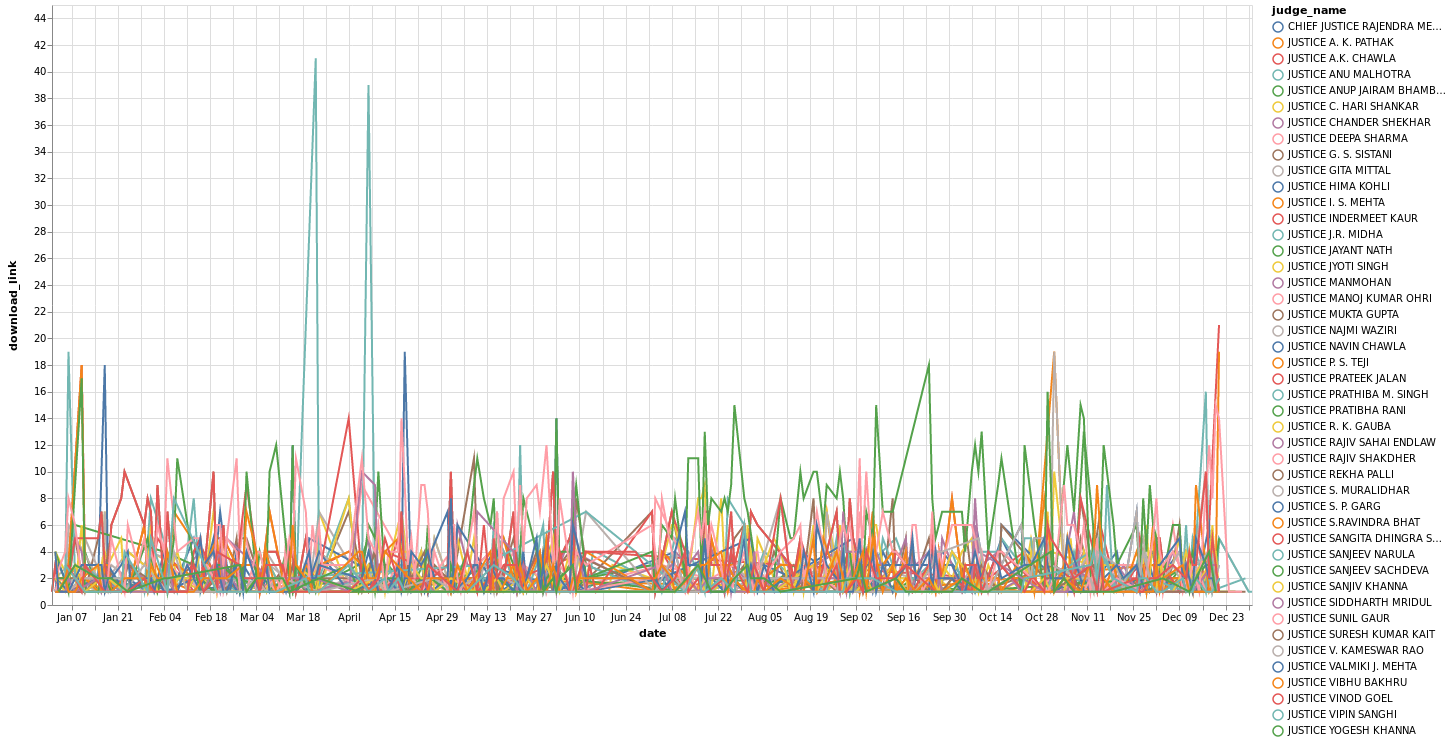

In [75]:
alt.Chart(judgements_per_judge, width=1200, height=600).mark_line().encode(
    x='date',
    y='download_link',
    color='judge_name',
    tooltip='judge_name'
)

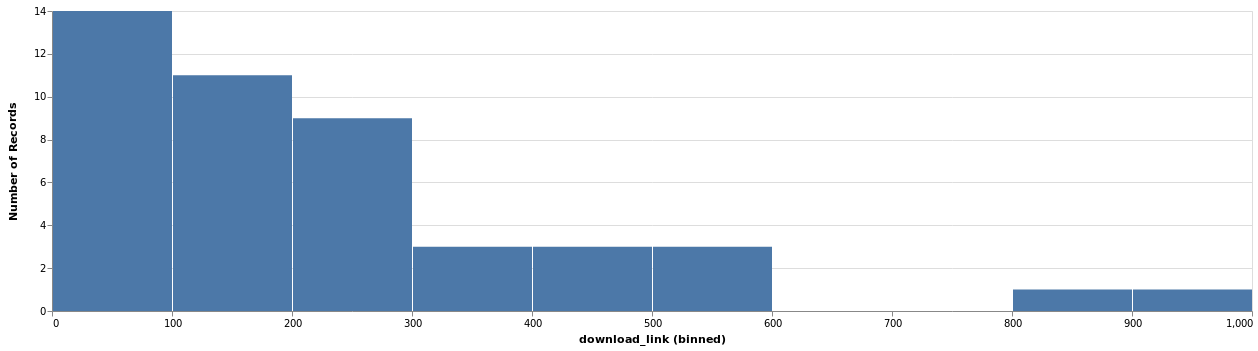

In [78]:
total_judgements_per_judge = judgements_per_judge.groupby('judge_name').sum().reset_index()
alt.Chart(total_judgements_per_judge, width=1200).mark_bar().encode(
    x=alt.X('download_link', bin=True),
    y='count()'
)

In [83]:
total_judgements_per_judge.sort_values('download_link', ascending=False)

,judge_name,download_link
34,JUSTICE SANJEEV SACHDEVA,909
37,JUSTICE SUNIL GAUR,846
25,JUSTICE R. K. GAUBA,512
32,JUSTICE SANGITA DHINGRA SEHGAL,506
8,JUSTICE G. S. SISTANI,501
23,JUSTICE PRATHIBA M. SINGH,480
31,JUSTICE S.RAVINDRA BHAT,421
40,JUSTICE VALMIKI J. MEHTA,419
2,JUSTICE A.K. CHAWLA,360
5,JUSTICE C. HARI SHANKAR,323


In [14]:
df

,case_number,date,download_link,judge_name,party
0,LPA--732/2018,2018-12-21,http://lobis.nic.in/ddir/dhc/VKR/judgement/07-...,CHIEF JUSTICE RAJENDRA MENON,ALL INDIA IDBI OFFICERS ASSOCIATION Vs.UNION O...
1,LPA--729/2018,2018-12-21,http://lobis.nic.in/ddir/dhc/VKR/judgement/24-...,CHIEF JUSTICE RAJENDRA MENON,DEVENDRA KUMAR GUPTA Vs.UNION OF INDIA & ORS
2,LPA--711/2018,2018-12-19,http://lobis.nic.in/ddir/dhc/VKR/judgement/20-...,CHIEF JUSTICE RAJENDRA MENON,UNION OF INDIA & ANR Vs.CHAND KAUR & ANR
3,LPA--637/2018,2018-12-18,http://lobis.nic.in/ddir/dhc/VKR/judgement/18-...,CHIEF JUSTICE RAJENDRA MENON,MAHYCO MONSANTO BIOTECH (INDIA) PRIVATE LTD & ...
4,W.P.(C)--13687/2018,2018-12-18,http://lobis.nic.in/ddir/dhc/VKR/judgement/19-...,CHIEF JUSTICE RAJENDRA MENON,PARVESH JAIN Vs.IDBI BANK LTD & ORS
5,W.P.(C)--13605/2018,2018-12-18,http://lobis.nic.in/ddir/dhc/VKR/judgement/19-...,CHIEF JUSTICE RAJENDRA MENON,MUKESH KUMAR Vs.UNION OF INDIA AND ANR.
6,FAO(OS)--15/2018,2018-12-18,http://lobis.nic.in/ddir/dhc/VKR/judgement/18-...,CHIEF JUSTICE RAJENDRA MENON,JASDEEP SINGH KALSI Vs.THE STATE & ORS.
7,W.P.(C)--13524/2018,2018-12-14,http://lobis.nic.in/ddir/dhc/VKR/judgement/15-...,CHIEF JUSTICE RAJENDRA MENON,DIVINE ORGANISATION OF RURAL EDUCATION (D.O.R....
8,W.P.(C)--13534/2018,2018-12-14,http://lobis.nic.in/ddir/dhc/VKR/judgement/15-...,CHIEF JUSTICE RAJENDRA MENON,RAJESH SHARMA AND ANR. Vs.PUNJAB NATIONAL BANK...
9,FAO(OS)--189/2018,2018-12-14,http://lobis.nic.in/ddir/dhc/VKR/judgement/15-...,CHIEF JUSTICE RAJENDRA MENON,HEMA BHANDARI Vs.HDFC BANK LTD & ORS


In [99]:
sanjeev = df[df.judge_name=="JUSTICE SANJEEV SACHDEVA"]

In [102]:
sanjeev['type'] = sanjeev['case_number'].str.split('-', expand=True)

/home/yuvipanda/.local/share/virtualenvs/datahub-NrFblQKL/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
sanjeev.groupby('type').count().sort_values('download_link', ascending=False)

,case_number,date,download_link,judge_name,party
type,,,,,
CRL.M.C.,507,507,507,507,507
BAIL APPLN.,269,269,269,269,269
CRL.REV.P.,85,85,85,85,85
W.P.(CRL),12,12,12,12,12
LPA,11,11,11,11,11
SERTA,7,7,7,7,7
CS(OS),7,7,7,7,7
CEAC,4,4,4,4,4
W.P.(C),4,4,4,4,4
